In [ ]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

In [ ]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [ ]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

In [295]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [296]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 = -1.509465;

In [297]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962
        0.9611190233149197
        0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.50947]

In [302]:
I0range = range( -1.509465, -1.509480, length = 1500 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [303]:
length(I0range)

1500

In [304]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.509465
parameter = -1.509465010006671
parameter = -1.5094650200133422
parameter = -1.5094650300200134
parameter = -1.5094650400266845
parameter = -1.5094650500333555
parameter = -1.5094650600400268
parameter = -1.5094650700466978
parameter = -1.5094650800533689
parameter = -1.50946509006004
parameter = -1.5094651000667112
parameter = -1.5094651100733822
parameter = -1.5094651200800533
parameter = -1.5094651300867246
parameter = -1.5094651400933956
parameter = -1.5094651501000667
parameter = -1.509465160106738
parameter = -1.509465170113409
parameter = -1.50946518012008
parameter = -1.509465190126751
parameter = -1.5094652001334223
parameter = -1.5094652101400934
parameter = -1.5094652201467644
parameter = -1.5094652301534357
parameter = -1.5094652401601067
parameter = -1.5094652501667778
parameter = -1.509465260173449
parameter = -1.5094652701801201
parameter = -1.5094652801867912
parameter = -1.5094652901934622
parameter = -1.5094653002001335
parameter = -1.509465310206

parameter = -1.5094675917278186
parameter = -1.5094676017344897
parameter = -1.5094676117411607
parameter = -1.5094676217478318
parameter = -1.509467631754503
parameter = -1.509467641761174
parameter = -1.5094676517678451
parameter = -1.5094676617745164
parameter = -1.5094676717811875
parameter = -1.5094676817878585
parameter = -1.5094676917945298
parameter = -1.5094677018012008
parameter = -1.5094677118078719
parameter = -1.5094677218145431
parameter = -1.5094677318212142
parameter = -1.5094677418278852
parameter = -1.5094677518345563
parameter = -1.5094677618412276
parameter = -1.5094677718478986
parameter = -1.5094677818545696
parameter = -1.509467791861241
parameter = -1.509467801867912
parameter = -1.509467811874583
parameter = -1.5094678218812543
parameter = -1.5094678318879253
parameter = -1.5094678418945964
parameter = -1.5094678519012674
parameter = -1.5094678619079387
parameter = -1.5094678719146097
parameter = -1.5094678819212808
parameter = -1.509467891927952
parameter = -1

parameter = -1.509470183455637
parameter = -1.5094701934623083
parameter = -1.5094702034689793
parameter = -1.5094702134756504
parameter = -1.5094702234823216
parameter = -1.5094702334889927
parameter = -1.5094702434956637
parameter = -1.509470253502335
parameter = -1.509470263509006
parameter = -1.509470273515677
parameter = -1.5094702835223481
parameter = -1.5094702935290194
parameter = -1.5094703035356904
parameter = -1.5094703135423615
parameter = -1.5094703235490328
parameter = -1.5094703335557038
parameter = -1.5094703435623749
parameter = -1.5094703535690461
parameter = -1.5094703635757172
parameter = -1.5094703735823882
parameter = -1.5094703835890593
parameter = -1.5094703935957305
parameter = -1.5094704036024016
parameter = -1.5094704136090726
parameter = -1.509470423615744
parameter = -1.509470433622415
parameter = -1.509470443629086
parameter = -1.5094704536357573
parameter = -1.5094704636424283
parameter = -1.5094704736490994
parameter = -1.5094704836557704
parameter = -1.

parameter = -1.5094727751834556
parameter = -1.5094727851901268
parameter = -1.509472795196798
parameter = -1.509472805203469
parameter = -1.50947281521014
parameter = -1.5094728252168113
parameter = -1.5094728352234823
parameter = -1.5094728452301533
parameter = -1.5094728552368246
parameter = -1.5094728652434957
parameter = -1.5094728752501667
parameter = -1.509472885256838
parameter = -1.509472895263509
parameter = -1.50947290527018
parameter = -1.5094729152768511
parameter = -1.5094729252835224
parameter = -1.5094729352901934
parameter = -1.5094729452968645
parameter = -1.5094729553035358
parameter = -1.5094729653102068
parameter = -1.5094729753168779
parameter = -1.5094729853235491
parameter = -1.5094729953302202
parameter = -1.5094730053368912
parameter = -1.5094730153435625
parameter = -1.5094730253502335
parameter = -1.5094730353569046
parameter = -1.5094730453635756
parameter = -1.509473055370247
parameter = -1.509473065376918
parameter = -1.509473075383589
parameter = -1.5094

parameter = -1.509475346897932
parameter = -1.509475356904603
parameter = -1.5094753669112742
parameter = -1.5094753769179452
parameter = -1.5094753869246165
parameter = -1.5094753969312875
parameter = -1.5094754069379586
parameter = -1.5094754169446298
parameter = -1.5094754269513009
parameter = -1.509475436957972
parameter = -1.5094754469646432
parameter = -1.5094754569713142
parameter = -1.5094754669779853
parameter = -1.5094754769846563
parameter = -1.5094754869913276
parameter = -1.5094754969979987
parameter = -1.5094755070046697
parameter = -1.509475517011341
parameter = -1.509475527018012
parameter = -1.509475537024683
parameter = -1.5094755470313543
parameter = -1.5094755570380254
parameter = -1.5094755670446964
parameter = -1.5094755770513675
parameter = -1.5094755870580387
parameter = -1.5094755970647098
parameter = -1.5094756070713808
parameter = -1.5094756170780521
parameter = -1.5094756270847232
parameter = -1.5094756370913942
parameter = -1.5094756470980655
parameter = -1

parameter = -1.5094779386257504
parameter = -1.5094779486324217
parameter = -1.5094779586390927
parameter = -1.5094779686457638
parameter = -1.509477978652435
parameter = -1.509477988659106
parameter = -1.5094779986657771
parameter = -1.5094780086724482
parameter = -1.5094780186791195
parameter = -1.5094780286857905
parameter = -1.5094780386924616
parameter = -1.5094780486991328
parameter = -1.5094780587058039
parameter = -1.509478068712475
parameter = -1.5094780787191462
parameter = -1.5094780887258172
parameter = -1.5094780987324883
parameter = -1.5094781087391593
parameter = -1.5094781187458306
parameter = -1.5094781287525016
parameter = -1.5094781387591727
parameter = -1.509478148765844
parameter = -1.509478158772515
parameter = -1.509478168779186
parameter = -1.5094781787858573
parameter = -1.5094781887925284
parameter = -1.5094781987991994
parameter = -1.5094782088058705
parameter = -1.5094782188125417
parameter = -1.5094782288192128
parameter = -1.5094782388258838
parameter = -1

### Scale правой части

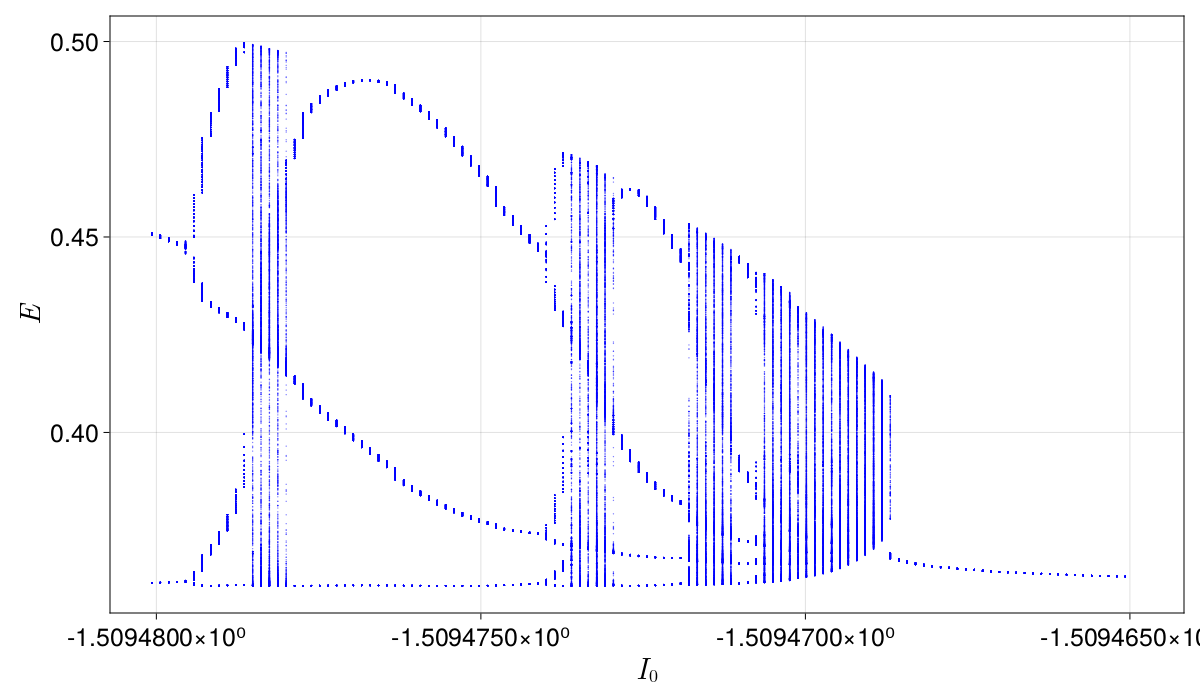

In [305]:
f = Figure(resolution = (1200, 700))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 2.0)
end
f

In [307]:
save("E_scale_right_detailed.jld", "data", output)

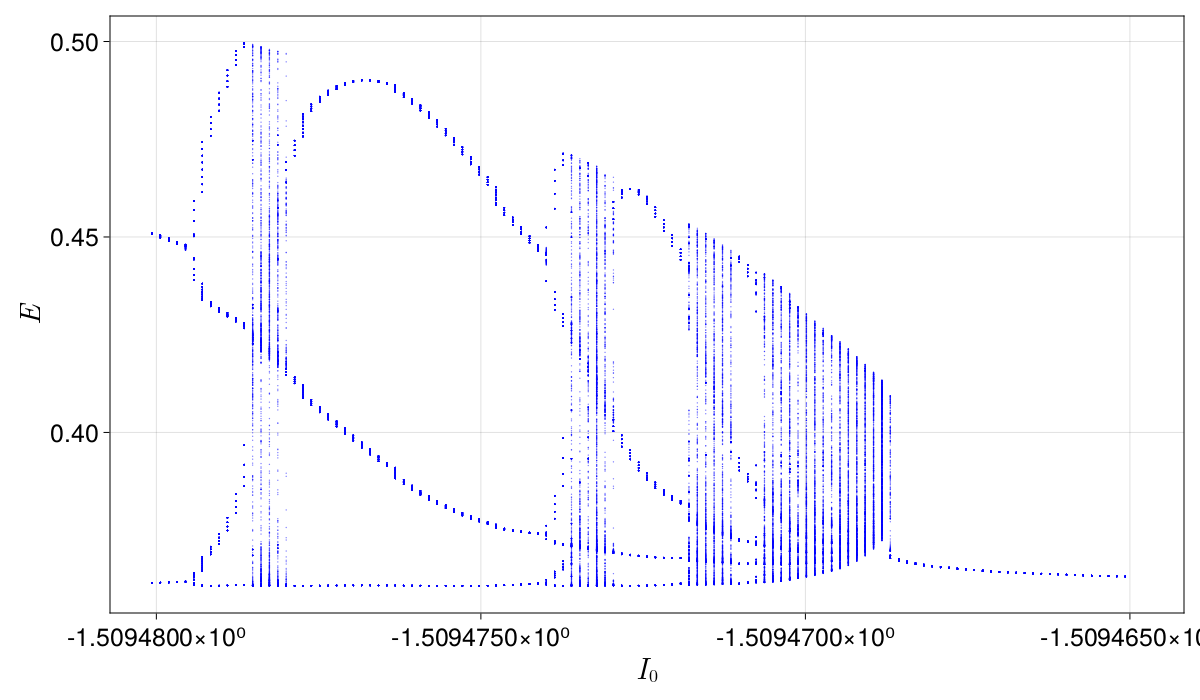

In [301]:
f = Figure(resolution = (1200, 700))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 2.0)
end
f

## Фрагмент правой части

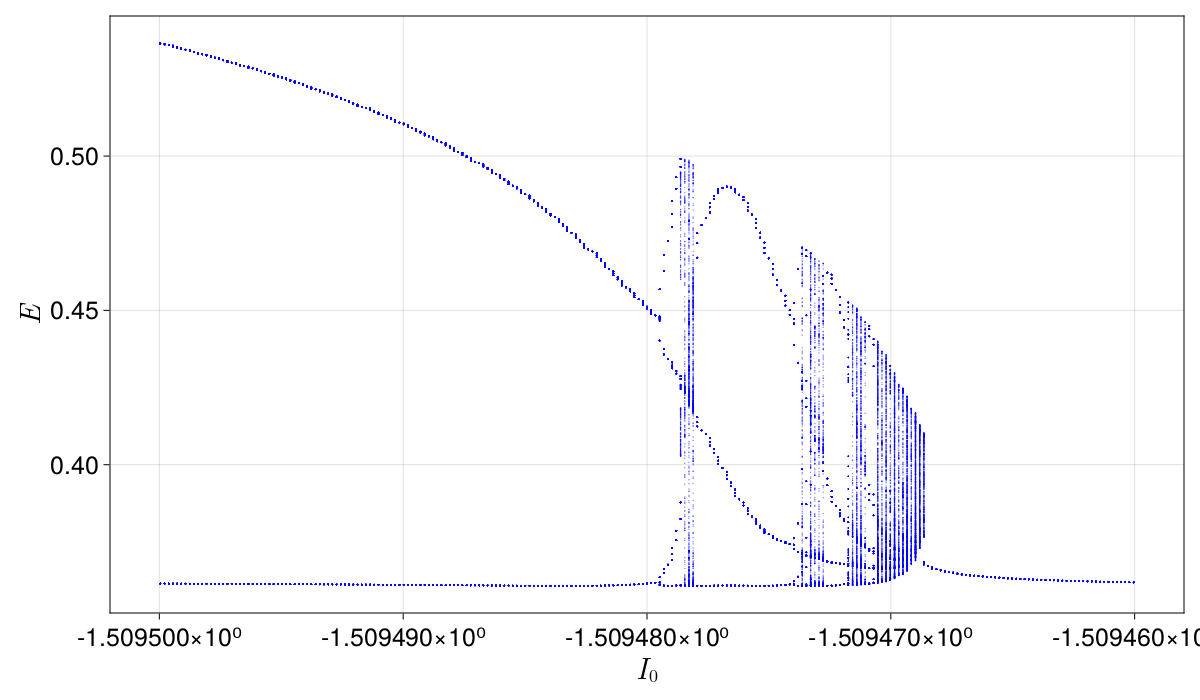

In [283]:
I0range_r = range( -1.509465, -1.5095, length = 500 )
f = Figure(resolution = (1200, 700))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range_r)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 2.0)
end
f

### Общая картинка

In [281]:
E = load("E_many_plots.jld")["data"];
I0_t = range( -1.5094, -1.5115, length = 5000 );

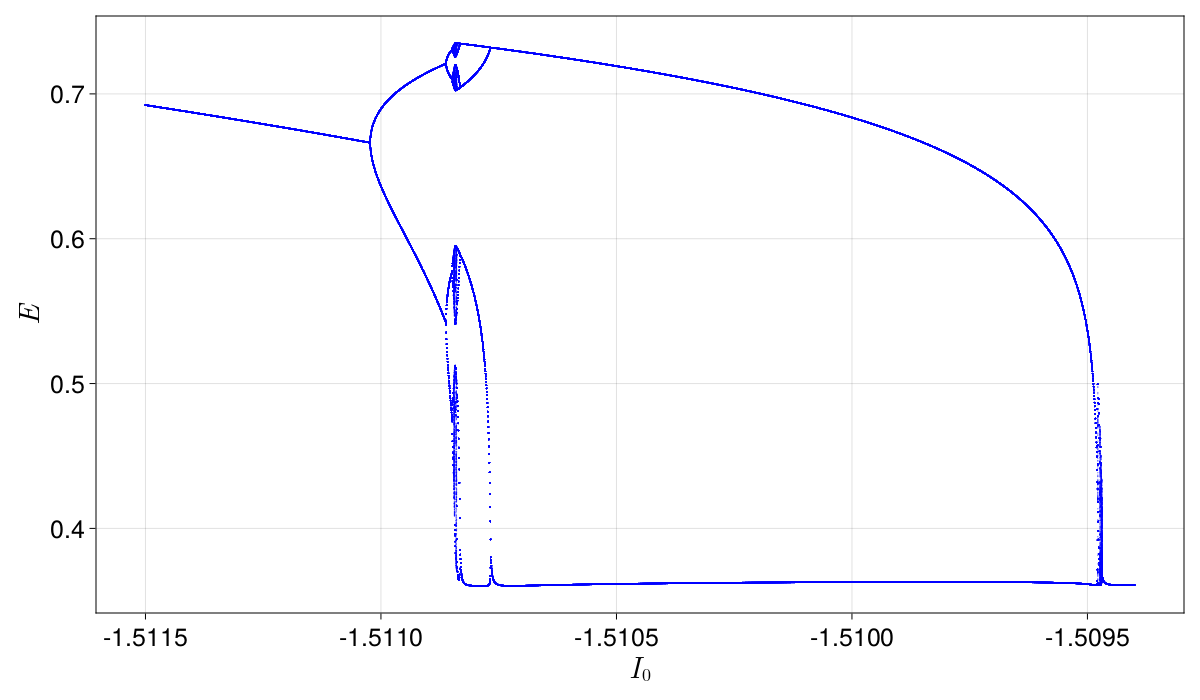

In [282]:
# I0range = range( -1.5094, -1.5115, length = 5000 )
f = Figure(resolution = (1200, 700))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0_t)
    scatter!(axis, fill(p, length(E[j])), E[j]; color = ("blue", 0.5), markersize = 2.0)
end
f